In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Завдання 1

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'

In [3]:
tables = pd.read_html(url)
df = tables[2]

## 1. Вивести перших 5 рядків

In [4]:
df.head()

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

## 2. Визначити розмір датасета.

In [5]:
df.shape

(210, 7)

## 3. Визначити оптимальну кількість стовпців.

In [6]:
df.columns

MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )

In [7]:
len(df.columns)

7

## 4. Змінити назви стовпців на більш зручні.

Перейменування стовпців

In [8]:
new_cols = ['Country', 'IMF_Forecast', 'IMF_Year', 'WorldBank_Estimate', 'WorldBank_Year', 'UN_Estimate', 'UN_Year']

In [9]:
df.columns = new_cols

In [10]:
df.head()

,Country,IMF_Forecast,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
0,World,109529216,2024,105435540,2023,100834796,2022
1,United States,28781083,2024,27360935,2023,25744100,2022
2,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
3,Germany,4591100,2024,4456081,2023,4076923,2022
4,Japan,4110452,2024,4212945,2023,4232173,2022


Перейменування стовпців та вдалення стовпців із даними про рік із датасету

In [12]:
df = df.rename(columns = {
    'IMF_Forecast' : 'MVF_2024',
    'WorldBank_Estimate' : 'WorldBank_2023',
    'UN_Estimate' : 'OON_2022'
})

df.drop(columns = ['IMF_Year', 'WorldBank_Year', 'UN_Year'], inplace = True)

In [13]:
df.head()

,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216,105435540,100834796
1,United States,28781083,27360935,25744100
2,China,18532633,17794782,17963170
3,Germany,4591100,4456081,4076923
4,Japan,4110452,4212945,4232173


## 5. Визначити тип даних.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country         210 non-null    object
 1   MVF_2024        210 non-null    object
 2   WorldBank_2023  210 non-null    object
 3   OON_2022        210 non-null    object
dtypes: object(4)
memory usage: 6.7+ KB


Всі дані, окрім стовпця 'Country' у датасеті числові, але типи даних - 'object', тому знінюємо типи даних на числові

In [15]:
df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors = 'coerce')
df['WorldBank_2023'] = pd.to_numeric(df['WorldBank_2023'], errors = 'coerce')
df['OON_2022'] = pd.to_numeric(df['OON_2022'], errors = 'coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         210 non-null    object 
 1   MVF_2024        195 non-null    float64
 2   WorldBank_2023  202 non-null    float64
 3   OON_2022        209 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.7+ KB


## 6. Замініть у таблиці значення "—" на значення NaN. Перевірити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення.

In [17]:
# Заміна '—' на NaN
df.replace('—', np.nan, inplace = True)

In [18]:
# Перевірка наявності пропущених значень
df.isna().sum()

Country            0
MVF_2024          15
WorldBank_2023     8
OON_2022           1
dtype: int64

In [19]:
# Заміна пропущених значень на середнє
df = df.fillna(df.mean(numeric_only = True), axis = 0)

## 7. Ще раз перевірити наявність пропущених значень.

In [20]:
df.isna().sum()

Country           0
MVF_2024          0
WorldBank_2023    0
OON_2022          0
dtype: int64

## 8. Перевірити наявність дублікатів. При наявності видалити дублікати.

In [21]:
df.duplicated().sum()

0

Дублікатів немає

## 9. Вивести описову статистику датасету describe()

In [22]:
df.describe().round()

,MVF_2024,WorldBank_2023,OON_2022
count,210.0,210.0,210.0
mean,1123228.0,1037206.0,961270.0
std,7900707.0,7602076.0,7275608.0
min,66.0,62.0,59.0
25%,14648.0,10442.0,8928.0
50%,62158.0,43416.0,32102.0
75%,436636.0,337659.0,241248.0
max,109529216.0,105435540.0,100834796.0


## 10. Визначте відхилення (різницю) між показниками MVF_2024 та WorldBank_2023 для кожної країни. У яких країнах ці показники найбільше відрізняються (дати відповідт)?

In [23]:
df['Difference_2024_2023'] = (df['MVF_2024'] - df['WorldBank_2023']).round()

In [24]:
df.head()

,Country,MVF_2024,WorldBank_2023,OON_2022,Difference_2024_2023
0,World,109529216.0,105435540.0,100834796.0,4093676.0
1,United States,28781083.0,27360935.0,25744100.0,1420148.0
2,China,18532633.0,17794782.0,17963170.0,737851.0
3,Germany,4591100.0,4456081.0,4076923.0,135019.0
4,Japan,4110452.0,4212945.0,4232173.0,-102493.0


In [25]:
largest_diff = df.nlargest(5, 'Difference_2024_2023')

In [26]:
largest_diff

,Country,MVF_2024,WorldBank_2023,OON_2022,Difference_2024_2023
0,World,1.095292e+08,105435540.0,100834796.0,4093676.0
1,United States,2.878108e+07,27360935.0,25744100.0,1420148.0
196,Turks and Caicos Islands,1.123228e+06,1402.0,1138.0,1121826.0
193,Sint Maarten,1.123228e+06,1623.0,1572.0,1121605.0
178,Curaçao,1.123228e+06,3074.0,3075.0,1120154.0


ТОП 5 країн, у яких найбільше відрізняються показники: World, United States, Turks and Caicos Islands, Sint Maarten, Curaçao

## 11. Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та OON_2022. Які пари змінних мають найвищу кореляцію?

In [27]:
selected_cols = ['MVF_2024', 'WorldBank_2023', 'OON_2022']

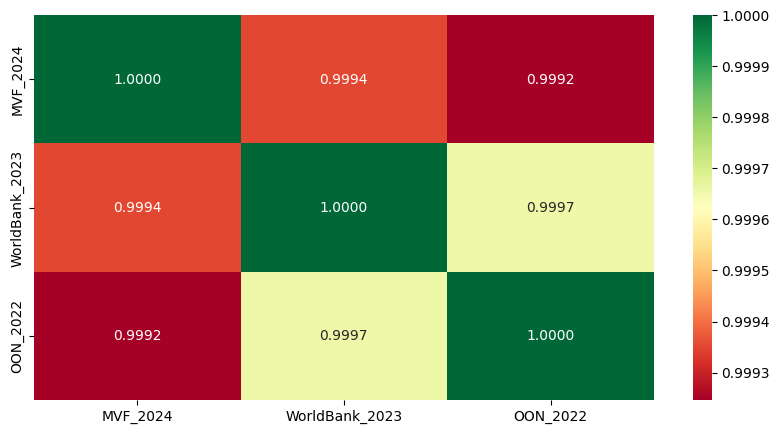

In [28]:
# Відображення кореляційної матриці
corr_data = df[selected_cols].corr()

plt.figure(figsize = (10, 5))
sns.heatmap(data = corr_data, annot = True, cmap = "RdYlGn", cbar = True, fmt='.4f')
plt.show()


In [29]:
highest_correlation = corr_data.unstack().sort_values(ascending = False)
highest_correlation = highest_correlation[highest_correlation < 1].head(1)

print(f"Пара з найвищою кореляцією:\n{highest_correlation}")

Пара з найвищою кореляцією:
WorldBank_2023  OON_2022    0.999656
dtype: float64


## 12. Обчисліть середнє значення для кожного стовпця (MVF_2024, WorldBank_2023, OON_2022). Як це середнє значення змінюється між роками?

In [30]:
df[selected_cols].mean().round()

MVF_2024          1123228.0
WorldBank_2023    1037206.0
OON_2022           961270.0
dtype: float64

З кожним роком середнє значення збільшується

## 13. Обчисліть стандартне відхилення показників для кожної країни. Яка країна має найвищу варіативність у показниках між роками?

In [31]:
std_dev = df[selected_cols].std(axis=1).round()

df['std_dev'] = std_dev

df_sorted = df.sort_values(by='std_dev', ascending=False)

df_sorted.head(10)


,Country,MVF_2024,WorldBank_2023,OON_2022,Difference_2024_2023,std_dev
0,World,1.095292e+08,105435540.0,100834796.0,4093676.0,4349674.0
1,United States,2.878108e+07,27360935.0,25744100.0,1420148.0,1519553.0
196,Turks and Caicos Islands,1.123228e+06,1402.0,1138.0,1121826.0,647763.0
193,Sint Maarten,1.123228e+06,1623.0,1572.0,1121605.0,647573.0
178,Curaçao,1.123228e+06,3074.0,3075.0,1120154.0,646721.0
176,Greenland,1.123228e+06,3236.0,2926.0,1119992.0,646717.0
166,French Polynesia,1.123228e+06,5815.0,5814.0,1117413.0,645139.0
164,Cayman Islands,1.123228e+06,6601.0,6281.0,1116627.0,644777.0
160,Liechtenstein,1.123228e+06,7365.0,7757.0,1115863.0,644130.0
161,Bermuda,1.123228e+06,7828.0,7546.0,1115400.0,644058.0


США має найвищу варіативність у показниках між роками

## 14. Визначення країни з найвищим та найнижчим показниками: Знайдіть країну з найвищим та найнижчим показниками у кожному з років (MVF_2024, WorldBank_2023, OON_2022).

In [32]:
df_filtered = df[df['Country'] != 'World']

for year in ['MVF_2024', 'WorldBank_2023', 'OON_2022']:
    max_country = df_filtered.loc[df_filtered[year].idxmax(), 'Country']
    min_country = df_filtered.loc[df_filtered[year].idxmin(), 'Country']
    print(f"Для {year}:")
    print(f"- Країна з максимальним показником: {max_country}")
    print(f"- Країна з мінімальним показником: {min_country}")

Для MVF_2024:
- Країна з максимальним показником: United States
- Країна з мінімальним показником: Tuvalu
Для WorldBank_2023:
- Країна з максимальним показником: United States
- Країна з мінімальним показником: Tuvalu
Для OON_2022:
- Країна з максимальним показником: United States
- Країна з мінімальним показником: Tuvalu


## 15. Побудуйте гістограму для розподілу показників MVF_2024 серед всіх країн. Який вигляд має розподіл? Чи є країни, що виділяються?

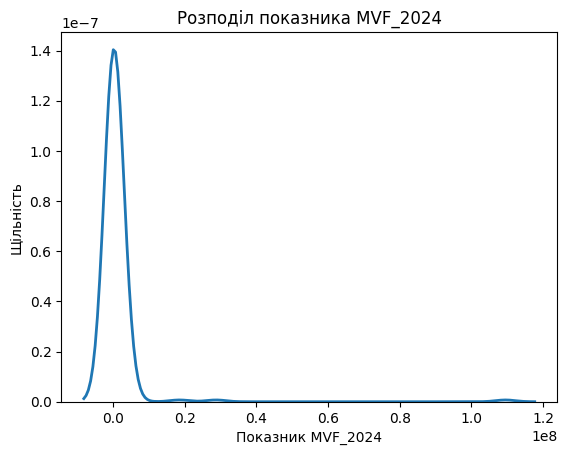

In [33]:
sns.kdeplot(data = df, x = 'MVF_2024', fill = False, linewidth=2)

plt.xlabel('Показник MVF_2024')
plt.ylabel('Щільність')
plt.title('Розподіл показника MVF_2024')

plt.show()

Більшість країн мають схожі значення показника MVF_2024, що може вказувати на загальні тенденції або вплив спільних факторів.
Правий "хвіст" графіка може вказувати на наявність кількох країн з аномально високими значеннями показника. 

## 16. Розрахуйте частку кожної країни в загальному значенні для кожного року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки країн з часом (дати відповідь)?

In [34]:
df = df[df['Country'] != 'World']

# Розрахунок загального ВВП за кожен рік
total_mvf = df['MVF_2024'].sum()
total_wb  = df['WorldBank_2023'].sum()
total_oon = df['OON_2022'].sum()

# Розрахунок частки кожної країни в загальному ВВП
df['MVF_share'] = df['MVF_2024'] / total_mvf
df['WB_share']  = df['WorldBank_2023'] / total_wb
df['OON_share'] = df['OON_2022'] / total_oon

# Виведення результатів
for index, row in df.iterrows():
    print(f"Назва країни: {row['Country']}")
    print(f"Частка у ВВП за МВФ 2024: {row['MVF_share']:.2%}")
    print(f"Частка у ВВП за Світовим банком 2023: {row['WB_share']:.2%}")
    print(f"Частка у ВВП за ООН 2022: {row['OON_share']:.2%}")
    print("-" * 30)

Назва країни: United States
Частка у ВВП за МВФ 2024: 22.78%
Частка у ВВП за Світовим банком 2023: 24.35%
Частка у ВВП за ООН 2022: 25.48%
------------------------------
Назва країни: China
Частка у ВВП за МВФ 2024: 14.67%
Частка у ВВП за Світовим банком 2023: 15.83%
Частка у ВВП за ООН 2022: 17.78%
------------------------------
Назва країни: Germany
Частка у ВВП за МВФ 2024: 3.63%
Частка у ВВП за Світовим банком 2023: 3.97%
Частка у ВВП за ООН 2022: 4.04%
------------------------------
Назва країни: Japan
Частка у ВВП за МВФ 2024: 3.25%
Частка у ВВП за Світовим банком 2023: 3.75%
Частка у ВВП за ООН 2022: 4.19%
------------------------------
Назва країни: India
Частка у ВВП за МВФ 2024: 3.12%
Частка у ВВП за Світовим банком 2023: 3.16%
Частка у ВВП за ООН 2022: 3.43%
------------------------------
Назва країни: United Kingdom
Частка у ВВП за МВФ 2024: 2.77%
Частка у ВВП за Світовим банком 2023: 2.97%
Частка у ВВП за ООН 2022: 3.06%
------------------------------
Назва країни: France


## 17. Візуалізуйте зміни в показниках для кожної країни за три роки на графіку. Які країни показують стабільне зростання або спад (дати відповідь)?

In [35]:
df.head()

,Country,MVF_2024,WorldBank_2023,OON_2022,Difference_2024_2023,std_dev,MVF_share,WB_share,OON_share
1,United States,28781083.0,27360935.0,25744100.0,1420148.0,1519553.0,0.227791,0.243473,0.254812
2,China,18532633.0,17794782.0,17963170.0,737851.0,386667.0,0.146679,0.158348,0.177797
3,Germany,4591100.0,4456081.0,4076923.0,135019.0,266574.0,0.036337,0.039653,0.040353
4,Japan,4110452.0,4212945.0,4232173.0,-102493.0,65435.0,0.032533,0.037489,0.041889
5,India,3937011.0,3549919.0,3465541.0,387092.0,251411.0,0.031160,0.031589,0.034301


In [36]:
cols = ['MVF_2024', 'WorldBank_2023', 'OON_2022']

In [37]:
df_to_use = df[['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022']]
df_to_use.head()

,Country,MVF_2024,WorldBank_2023,OON_2022
1,United States,28781083.0,27360935.0,25744100.0
2,China,18532633.0,17794782.0,17963170.0
3,Germany,4591100.0,4456081.0,4076923.0
4,Japan,4110452.0,4212945.0,4232173.0
5,India,3937011.0,3549919.0,3465541.0


In [41]:
df_long = df_to_use.melt(id_vars = "Country", var_name = "Year", value_name = "Value")

fig = px.bar(df_long, x = "Country", y = "Value", 
             color = "Year", barmode = "group", 
             title = "Зміни в показниках для кожної країни за три роки")

fig.update_layout(width = 3700, height = 550)

fig.show()

США, Німеччина, Великобританія, Франція, Італія, Іспанія, Нідерланди, Саудівська Аравія, Польша показують стабільне зростання

## Висновки до завдання 1

У даному завданні я навчилась як зчитувати таблиці із сайтів, і також проаналізувала таблицю щодо показників ВВП за країнами протягом трьох років (2022, 2023, 2024). Деякі спостереження:
 - У більшості країнах показник ВВП збільшується протягом трьох років.
 - Найвищий показник ВВп має США.

# Завдання 2

In [43]:
df_titanic = pd.read_csv('titanic.csv')

## 1. Вивести перших 5 рядків

In [44]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2. Визначити розмір датасета

In [45]:
df_titanic.shape

(418, 12)

## 3. Визначити тип даних

In [46]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [47]:
df_titanic.Ticket.unique()

array(['330911', '363272', '240276', '315154', '3101298', '7538',
       '330972', '248738', '2657', 'A/4 48871', '349220', '694', '21228',
       '24065', 'W.E.P. 5734', 'SC/PARIS 2167', '233734', '2692',
       'STON/O2. 3101270', '2696', 'PC 17603', 'C 17368', 'PC 17598',
       'PC 17597', 'PC 17608', 'A/5. 3337', '113509', '2698', '113054',
       '2662', 'SC/AH 3085', 'C.A. 31029', 'C.A. 2315', 'W./C. 6607',
       '13236', '2682', '342712', '315087', '345768', '1601', '349256',
       '113778', 'SOTON/O.Q. 3101263', '237249', '11753',
       'STON/O 2. 3101291', 'PC 17594', '370374', '11813', 'C.A. 37671',
       '13695', 'SC/PARIS 2168', '29105', '19950', 'SC/A.3 2861',
       '382652', '349230', '348122', '386525', '349232', '237216',
       '347090', '334914', 'F.C.C. 13534', '330963', '113796', '2543',
       '382653', '349211', '3101297', 'PC 17562', '113503', '359306',
       '11770', '248744', '368702', '2678', 'PC 17483', '19924', '349238',
       '240261', '2660', '3308

Типи даних у всіх стовпцях визначені правильно.
Також, на перший погляд здається, що тип даних у стовпці 'Ticket' можна змінити із object на int, але - ні, оскільки, якщо вивести унікальні значення стовпця, то можна побачити, що в номерах деяких білетів також присутні літери.

## 4. Визначити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення

In [48]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Два стовпця мають пропущенні значення:
 - `Age` - стовпець має числовий тип даних, тому можна пропущенні значення замінити середнім 
 - `Fare` - стовпець має числовий тип даних, тому можна пропущенні значення замінити середнім 
 - `Cabin` - має 78% пропущених значень, тому вважаю, що треба видалити даний стовпець

In [49]:
df_titanic['Age'].fillna(df_titanic['Age'].mean(skipna = True), inplace = True)
df_titanic['Fare'].fillna(df_titanic['Fare'].mean(skipna = True), inplace = True)
df_titanic.drop('Cabin', axis = 1, inplace = True)

## 5. Ще раз перевірити наявність пропущених значень

In [50]:
df_titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 6. Перевірити наявність дублікатів. При наявності видалити дублікати

In [51]:
df_titanic.duplicated().sum()

0

Дублікатів немає

## 7. Вивести описову статистику датасету describe()

In [52]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 8. Видалити стовпчик Cabin

Даний стовпчик вже видалено

## 9. Сформувати датасет з обраними стовпцями: ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']

In [53]:
cols_to_use = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']

In [54]:
df_titanic_to_use = df_titanic[cols_to_use]

In [55]:
df_titanic_to_use.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


## 10. Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні значення даного стовпчика)

In [56]:
df_titanic_to_use.Sex.unique()

array(['male', 'female'], dtype=object)

Заміню на такі значення:
 - male -> 0
 - female -> 1

In [57]:
df_titanic_to_use['Sex'] = df_titanic_to_use['Sex'].map({'male' : 0, 'female': 1})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25628\3099922925.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
df_titanic_to_use.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.5,7.8292
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875


## 11. Ще раз перевірити кількість пропущених даних (впевнитись, що їх немає)

In [59]:
df_titanic_to_use.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

## 12. Вивести 5 перших рядків датасету

In [60]:
df_titanic_to_use.head(5)

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.5,7.8292
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875


## 13. Вивести 5 останніх рядків датасету

In [61]:
df_titanic_to_use.tail(5)

,Survived,Pclass,Sex,Age,Fare
413,0,3,0,30.27259,8.0500
414,1,1,1,39.00000,108.9000
415,0,3,0,38.50000,7.2500
416,0,3,0,30.27259,8.0500
417,0,3,0,30.27259,22.3583


## 14. Аналіз виживання залежно від статі: Обчисліть відсоток виживання для кожної статі. Чи була різниця у виживанні між чоловіками та жінками?

In [62]:
survived_f      = df_titanic_to_use.query('Survived == 1 and Sex == 1')
survived_f_perc = survived_f['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100

survived_m      = df_titanic_to_use.query('Survived == 1 and Sex == 0')
survived_m_perc = survived_m['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100

print(f'Відсоток виживання серед жінок: {survived_f_perc.round(2)} %')
print(f'Відсоток виживання серед чоловіків: {survived_m_perc} %')

Відсоток виживання серед жінок: 36.36 %
Відсоток виживання серед чоловіків: 0.0 %


Серед жінок 36% вижило, серед чоловіків виживших немає.

## 15. Обчисліть відсоток виживання для кожного класу (Pclass). Який клас мав найвищий рівень виживання (дати відповідь)?

In [63]:
df_titanic_to_use.Pclass.unique()

array([3, 2, 1], dtype=int64)

In [64]:
survived_pclass_1      = df_titanic_to_use.query('Survived == 1 and Pclass == 1')
survived_pclass_1_perc = survived_pclass_1['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100

survived_pclass_2      = df_titanic_to_use.query('Survived == 1 and Pclass == 2')
survived_pclass_2_perc = survived_pclass_2['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100

survived_pclass_3      = df_titanic_to_use.query('Survived == 1 and Pclass == 3')
survived_pclass_3_perc = survived_pclass_3['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100


print(f'Відсоток виживання серед класу 1: {survived_pclass_1_perc.round(2)} %')
print(f'Відсоток виживання серед класу 2: {survived_pclass_2_perc.round(2)} %')
print(f'Відсоток виживання серед класу 3: {survived_pclass_3_perc.round(2)} %')

Відсоток виживання серед класу 1: 11.96 %
Відсоток виживання серед класу 2: 7.18 %
Відсоток виживання серед класу 3: 17.22 %


`Третій` клас мав найвищий рівень виживання

## 16. Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи впливає вік на виживання (дати відповідь)?

In [65]:
# Для зручності створюю окремі датасети із тими хто вижив та не вижив
df_titanic_to_use_survived     = df_titanic_to_use[df_titanic_to_use['Survived'] == 1]
df_titanic_to_use_not_survived = df_titanic_to_use[df_titanic_to_use['Survived'] == 0]

In [66]:
mean_age_survived = df_titanic_to_use_survived.Age.mean()
mean_age_not_survived = df_titanic_to_use_not_survived.Age.mean()

print(f'Середній вік людей, які вижили: {mean_age_survived.round(4)}')
print(f'Середній вік людей, які не вижили: {mean_age_not_survived.round(4)}')

Середній вік людей, які вижили: 30.2724
Середній вік людей, які не вижили: 30.2727


Середній вік людей не відрізняється, тому вік не впливає на виживання людини

## 17. Розподіліть пасажирів на групи за рівнями тарифів (Fare) і обчисліть рівень виживання для кожної групи. Як тариф впливав на шанси виживання (дати відповідь)?

In [67]:
df_titanic_to_use.Fare.describe()

count    418.000000
mean      35.627188
std       55.840500
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

Розділю пасажирів залежно від тарифів на чотири групи за квартилями

In [68]:
df_titanic_to_use['Fare_group'] = pd.qcut(df_titanic_to_use['Fare'], 
                                          q = 4, 
                                          labels = ['Low', 'Medium-Low', 'Medium-High', 'High'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25628\2078008878.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
df_titanic_to_use.Fare_group.value_counts()

Fare_group
Low            114
Medium-High    105
High           103
Medium-Low      96
Name: count, dtype: int64

In [70]:
survived_fare_low      = df_titanic_to_use.query('Fare_group == "Low" and Survived == 1')
survived_fare_low_perc = survived_fare_low['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100

survived_fare_medium_low      = df_titanic_to_use.query('Fare_group == "Medium-Low" and Survived == 1')
survived_fare_medium_low_perc = survived_fare_medium_low['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100

survived_fare_medium_high      = df_titanic_to_use.query('Fare_group == "Medium-High" and Survived == 1')
survived_fare_medium_high_perc = survived_fare_medium_high['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100

survived_fare_high      = df_titanic_to_use.query('Fare_group == "High" and Survived == 1')
survived_fare_high_perc = survived_fare_high['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100

print(f'Відсоток виживання серед групи Low: {survived_fare_low_perc.round(2)} %')
print(f'Відсоток виживання серед групи Medium-Low: {survived_fare_medium_low_perc.round(2)} %')
print(f'Відсоток виживання серед групи Medium-High: {survived_fare_medium_high_perc.round(2)} %')
print(f'Відсоток виживання серед групи High: {survived_fare_high_perc.round(2)} %')

Відсоток виживання серед групи Low: 7.18 %
Відсоток виживання серед групи Medium-Low: 6.22 %
Відсоток виживання серед групи Medium-High: 9.81 %
Відсоток виживання серед групи High: 13.16 %


Отже, можна зробити висновок, щоб чим дорожчий тариф, тим більше було шансів виживання.

## 18. Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного класу (Pclass). Чи існує значна різниця у тарифах між класами (дати відповідь)?

In [71]:
df_titanic_to_use.Pclass.unique()

array([3, 2, 1], dtype=int64)

In [72]:
mean_fare_class_1 = df_titanic_to_use.query('Pclass == 1')['Fare'].mean()
mean_fare_class_2 = df_titanic_to_use.query('Pclass == 2')['Fare'].mean()
mean_fare_class_3 = df_titanic_to_use.query('Pclass == 3')['Fare'].mean()

print(f'Середнє значення тарифу для класу 1: {mean_fare_class_1.round(2)}')
print(f'Середнє значення тарифу для класу 2: {mean_fare_class_2.round(2)}')
print(f'Середнє значення тарифу для класу 3: {mean_fare_class_3.round(2)}')

Середнє значення тарифу для класу 1: 94.28
Середнє значення тарифу для класу 2: 22.2
Середнє значення тарифу для класу 3: 12.57


Отже, чим нижчий клас, тим тариф дешевший.

## 19. Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік пасажирів розподіляється за класами (дати відповідь)?

In [73]:
mean_age_class_1 = df_titanic_to_use.query('Pclass == 1')['Age'].mean()
mean_age_class_2 = df_titanic_to_use.query('Pclass == 2')['Age'].mean()
mean_age_class_3 = df_titanic_to_use.query('Pclass == 3')['Age'].mean()

print(f'Середнє значення віку для класу 1: {mean_age_class_1.round(2)}')
print(f'Середнє значення віку для класу 2: {mean_age_class_2.round(2)}')
print(f'Середнє значення віку для класу 3: {mean_age_class_3.round(2)}')

Середнє значення віку для класу 1: 40.02
Середнє значення віку для класу 2: 28.86
Середнє значення віку для класу 3: 26.09


Отже, чим старша людина, тим вищий клас людина обрала. Це може буььи пов'язано із тим, що стараші люди зазвийчай більше заробляють, тому можуть дозволити собі придбати квитки вищого класу.

## 20. Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто не вижив. Чи є видимі відмінності у вікових групах (дати відповідь)?

In [74]:
fig = px.histogram(df_titanic_to_use[df_titanic_to_use['Survived'] == 1],
                   x = 'Age',
                   marginal = 'box',
                   title = 'Гістограма розподілу віку для тих, хто вижив')

fig.update_layout(bargap=0.1)

fig.show()

Найбільше людей, які вижили мали вік 30-34 роки, а найменше - 40-44 та 75-79

## 21. Обчисліть відсоток виживання для кожної комбінації статі та класу (наприклад, жінки в 1-му класі, чоловіки в 3-му класі). Яка група мала найвищий рівень виживання (дати відповідь)?

In [75]:
survived = df_titanic_to_use[df_titanic_to_use['Survived'] == 1]

female_class_1      = survived.query('Sex == 1 and Pclass == 1')
female_class_1_perc = female_class_1['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100

female_class_2      = survived.query('Sex == 1 and Pclass == 2')
female_class_2_perc = female_class_2['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100

female_class_3      = survived.query('Sex == 1 and Pclass == 3')
female_class_3_perc = female_class_3['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100

male_class_1      = survived.query('Sex == 0 and Pclass == 1')
male_class_1_perc = male_class_1['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100

male_class_2      = survived.query('Sex == 0 and Pclass == 2')
male_class_2_perc = male_class_2['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100

male_class_3      = survived.query('Sex == 0 and Pclass == 3')
male_class_3_perc = male_class_3['Survived'].sum() / len(df_titanic_to_use['Survived']) * 100


print(f'Відсоток виживання серед жінок класу 1: {female_class_1_perc.round(2)} %')
print(f'Відсоток виживання серед жінок класу 2: {female_class_2_perc.round(2)} %')
print(f'Відсоток виживання серед жінок класу 3: {female_class_3_perc.round(2)} %')

print(f'Відсоток виживання серед чоловіків класу 1: {male_class_1_perc.round(2)} %')
print(f'Відсоток виживання серед чоловіків класу 2: {male_class_2_perc.round(2)} %')
print(f'Відсоток виживання серед чоловіків класу 3: {male_class_3_perc.round(2)} %')

Відсоток виживання серед жінок класу 1: 11.96 %
Відсоток виживання серед жінок класу 2: 7.18 %
Відсоток виживання серед жінок класу 3: 17.22 %
Відсоток виживання серед чоловіків класу 1: 0.0 %
Відсоток виживання серед чоловіків класу 2: 0.0 %
Відсоток виживання серед чоловіків класу 3: 0.0 %


Серед жінок найбільше виживших у найнижчому (3) класі.
Серед чоловіків виживших немає взагалі.

## 22. Обчисліть кореляцію між усіма числовими змінними (Survived, Pclass, Age, Fare). Які змінні найбільш сильно корелюють з виживанням (дати відповідь)?

In [76]:
cols_for_corr = ['Survived', 'Pclass', 'Sex', 'Age', 'Fare']

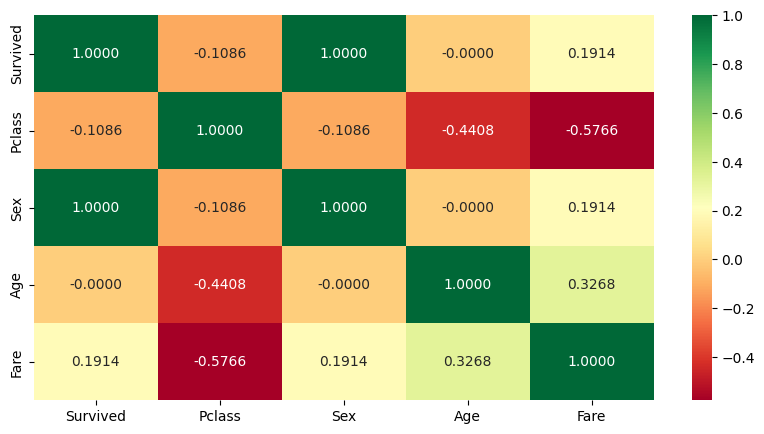

In [77]:
corr_data_titanic = df_titanic_to_use[cols_for_corr].corr()

plt.figure(figsize = (10, 5))
sns.heatmap(data = corr_data_titanic, annot = True, cmap = "RdYlGn", cbar = True, fmt='.4f')
plt.show()

In [78]:
highest_correlation = corr_data_titanic.unstack().sort_values(ascending = False)
highest_correlation = highest_correlation[highest_correlation < 1].head(20)

print(f"Пара з найвищою кореляцією:\n{highest_correlation}")

Пара з найвищою кореляцією:
Fare      Age         0.326800
Age       Fare        0.326800
Sex       Fare        0.191382
Fare      Sex         0.191382
          Survived    0.191382
Survived  Fare        0.191382
Age       Sex        -0.000011
          Survived   -0.000011
Sex       Age        -0.000011
Survived  Age        -0.000011
          Pclass     -0.108615
Pclass    Survived   -0.108615
Sex       Pclass     -0.108615
Pclass    Sex        -0.108615
Age       Pclass     -0.440782
Pclass    Age        -0.440782
          Fare       -0.576619
Fare      Pclass     -0.576619
dtype: float64


Із стовпцем `Survived` найбільше корелюють `Pclass` та `Fare`

## Висновки до завдання 2

Я зробила аналіз датасету Titanic, у якому були дані щодо виживших людей на Титаніку. Можна зазначити, що:
 - Серед чоловіків виживших не було. 
 - Третій (найнижчий) клас мав найвищий відсоток виживших.
 - Найбільше жінок вижили тих, хто мав квитки третього класу.